In [76]:
import pandas as pd
import seaborn as sns
import prophet
import swifter
from prophet import Prophet
from tqdm import tqdm

In [3]:
df = pd.read_csv("/data/kaggle/tabular-playground-series-jan-2022/train.csv")

In [57]:
df_test = pd.read_csv("/data/kaggle/tabular-playground-series-jan-2022/test.csv")

In [4]:
df.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


# preprocess

We link country, store, product together

In [26]:
def link_store(row):
    sep = "___"
    store_name = row["country"] + sep + row["store"] + sep + row["product"].replace(" ", "x")
    row["store_name"] = store_name
    return row

In [27]:
df_small = df.head()

In [28]:
r1 = df_small.apply(link_store, axis=1)
r1.head()

,row_id,date,country,store,product,num_sold,store_name
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,Finland___KaggleMart___KagglexMug
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,Finland___KaggleMart___KagglexHat
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,Finland___KaggleMart___KagglexSticker
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,Finland___KaggleRama___KagglexMug
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,Finland___KaggleRama___KagglexHat


In [29]:
df2 = df.swifter.apply(link_store, axis=1)

In [30]:
df2.head()

,row_id,date,country,store,product,num_sold,store_name
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,Finland___KaggleMart___KagglexMug
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,Finland___KaggleMart___KagglexHat
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,Finland___KaggleMart___KagglexSticker
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,Finland___KaggleRama___KagglexMug
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,Finland___KaggleRama___KagglexHat


In [31]:
df2.shape

(26298, 7)

In [32]:
df3 = df2[["row_id", "date", "store_name", "num_sold"]]

In [33]:
df3.head()

,row_id,date,store_name,num_sold
0,0,2015-01-01,Finland___KaggleMart___KagglexMug,329
1,1,2015-01-01,Finland___KaggleMart___KagglexHat,520
2,2,2015-01-01,Finland___KaggleMart___KagglexSticker,146
3,3,2015-01-01,Finland___KaggleRama___KagglexMug,572
4,4,2015-01-01,Finland___KaggleRama___KagglexHat,911


In [34]:
df4 = df3[["date", "store_name", "num_sold"]]

In [35]:
df4.head()

,date,store_name,num_sold
0,2015-01-01,Finland___KaggleMart___KagglexMug,329
1,2015-01-01,Finland___KaggleMart___KagglexHat,520
2,2015-01-01,Finland___KaggleMart___KagglexSticker,146
3,2015-01-01,Finland___KaggleRama___KagglexMug,572
4,2015-01-01,Finland___KaggleRama___KagglexHat,911


In [37]:
df_pivot1 = pd.pivot_table(df4, index="date", columns="store_name", values="num_sold")

In [39]:
df_pivot1.head()

store_name,Finland___KaggleMart___KagglexHat,Finland___KaggleMart___KagglexMug,Finland___KaggleMart___KagglexSticker,Finland___KaggleRama___KagglexHat,Finland___KaggleRama___KagglexMug,Finland___KaggleRama___KagglexSticker,Norway___KaggleMart___KagglexHat,Norway___KaggleMart___KagglexMug,Norway___KaggleMart___KagglexSticker,Norway___KaggleRama___KagglexHat,Norway___KaggleRama___KagglexMug,Norway___KaggleRama___KagglexSticker,Sweden___KaggleMart___KagglexHat,Sweden___KaggleMart___KagglexMug,Sweden___KaggleMart___KagglexSticker,Sweden___KaggleRama___KagglexHat,Sweden___KaggleRama___KagglexMug,Sweden___KaggleRama___KagglexSticker
date,,,,,,,,,,,,,,,,,,
2015-01-01,520,329,146,911,572,283,906,526,250,1461,1005,395,624,440,175,1195,706,324
2015-01-02,493,318,127,794,544,249,845,538,237,1446,949,415,572,384,155,986,653,293
2015-01-03,535,360,141,843,579,265,930,614,254,1631,1029,451,630,420,173,1167,734,319
2015-01-04,544,332,125,873,582,245,889,589,255,1540,957,455,697,406,169,1112,657,300
2015-01-05,378,243,102,668,423,187,671,435,184,1126,739,310,442,298,127,796,512,227


# 2. model

In [54]:
m = Prophet()

In [45]:
list(df_pivot1.columns)

['Finland___KaggleMart___KagglexHat',
 'Finland___KaggleMart___KagglexMug',
 'Finland___KaggleMart___KagglexSticker',
 'Finland___KaggleRama___KagglexHat',
 'Finland___KaggleRama___KagglexMug',
 'Finland___KaggleRama___KagglexSticker',
 'Norway___KaggleMart___KagglexHat',
 'Norway___KaggleMart___KagglexMug',
 'Norway___KaggleMart___KagglexSticker',
 'Norway___KaggleRama___KagglexHat',
 'Norway___KaggleRama___KagglexMug',
 'Norway___KaggleRama___KagglexSticker',
 'Sweden___KaggleMart___KagglexHat',
 'Sweden___KaggleMart___KagglexMug',
 'Sweden___KaggleMart___KagglexSticker',
 'Sweden___KaggleRama___KagglexHat',
 'Sweden___KaggleRama___KagglexMug',
 'Sweden___KaggleRama___KagglexSticker']

In [47]:
df_pivot1.index

Index(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05',
       '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10',
       ...
       '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25', '2018-12-26',
       '2018-12-27', '2018-12-28', '2018-12-29', '2018-12-30', '2018-12-31'],
      dtype='object', name='date', length=1461)

In [51]:
df_sample = pd.DataFrame(data={"ds": df_pivot1.index, "y": df_pivot1["Finland___KaggleMart___KagglexHat"]})

In [55]:
m.fit(df_sample)

In [56]:
future = m.make_future_dataframe(periods=365)
future.head()

,ds
0,2015-01-01
1,2015-01-02
2,2015-01-03
3,2015-01-04
4,2015-01-05


In [62]:
df_test_date = df_test[["date"]]
df_test_date.columns = ["ds"]

In [64]:
df_forecast = m.predict(df_test_date)

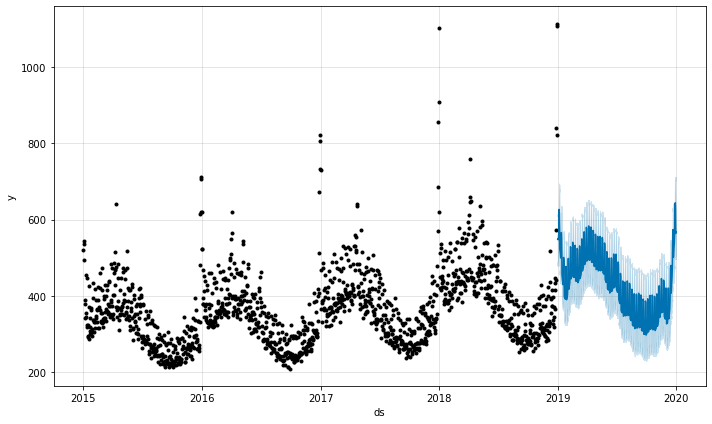

In [65]:
fig1 = m.plot(df_forecast)

## 2.1 Loop

In [66]:
model_dict = {}
train_dict = {}
forcase_dict = {}

In [67]:
store_name = "Finland___KaggleMart___KagglexHat"

In [ ]:
df_test_date = df_test[["date"]]
df_test_date.columns = ["ds"]

In [71]:
df_process = pd.DataFrame(data={"ds": df_pivot1.index, "y": df_pivot1[store_name]})
model = Prophet()
model.fit(df_process)
df_test_date = df_test[["date"]]
df_test_date.columns = ["ds"]
df_forecast = m.predict(df_test_date)

In [100]:
def process_a_store(store_name, model_dict, train_dict, forcase_dict):
    df_process = pd.DataFrame(data={"ds": df_pivot1.index, "y": df_pivot1[store_name]})
    model = Prophet()
    model.fit(df_process)
    df_test_date = df_test[["date"]].drop_duplicates()
    df_test_date.columns = ["ds"]
    df_forecast = model.predict(df_test_date)
    model_dict[store_name] = model
    train_dict[store_name] = df_process
    forcase_dict[store_name] = df_forecast
    return df_forecast

In [101]:
store_list = list(df_pivot1.columns)
store_list

['Finland___KaggleMart___KagglexHat',
 'Finland___KaggleMart___KagglexMug',
 'Finland___KaggleMart___KagglexSticker',
 'Finland___KaggleRama___KagglexHat',
 'Finland___KaggleRama___KagglexMug',
 'Finland___KaggleRama___KagglexSticker',
 'Norway___KaggleMart___KagglexHat',
 'Norway___KaggleMart___KagglexMug',
 'Norway___KaggleMart___KagglexSticker',
 'Norway___KaggleRama___KagglexHat',
 'Norway___KaggleRama___KagglexMug',
 'Norway___KaggleRama___KagglexSticker',
 'Sweden___KaggleMart___KagglexHat',
 'Sweden___KaggleMart___KagglexMug',
 'Sweden___KaggleMart___KagglexSticker',
 'Sweden___KaggleRama___KagglexHat',
 'Sweden___KaggleRama___KagglexMug',
 'Sweden___KaggleRama___KagglexSticker']

In [103]:
model_dict = {}
train_dict = {}
forcase_dict = {}
for store_name in tqdm(store_list):
    process_a_store(store_name, model_dict, train_dict, forcase_dict)
    print("done with ", store_name)

  6%|▌         | 1/18 [00:01<00:27,  1.59s/it]

done with  Finland___KaggleMart___KagglexHat


 11%|█         | 2/18 [00:03<00:25,  1.56s/it]

done with  Finland___KaggleMart___KagglexMug


 17%|█▋        | 3/18 [00:04<00:23,  1.55s/it]

done with  Finland___KaggleMart___KagglexSticker


 22%|██▏       | 4/18 [00:06<00:21,  1.57s/it]

done with  Finland___KaggleRama___KagglexHat


 28%|██▊       | 5/18 [00:07<00:20,  1.55s/it]

done with  Finland___KaggleRama___KagglexMug


 33%|███▎      | 6/18 [00:09<00:18,  1.54s/it]

done with  Finland___KaggleRama___KagglexSticker


 39%|███▉      | 7/18 [00:10<00:17,  1.56s/it]

done with  Norway___KaggleMart___KagglexHat


 44%|████▍     | 8/18 [00:12<00:15,  1.56s/it]

done with  Norway___KaggleMart___KagglexMug


 50%|█████     | 9/18 [00:14<00:14,  1.57s/it]

done with  Norway___KaggleMart___KagglexSticker


 56%|█████▌    | 10/18 [00:15<00:12,  1.55s/it]

done with  Norway___KaggleRama___KagglexHat


 61%|██████    | 11/18 [00:17<00:11,  1.57s/it]

done with  Norway___KaggleRama___KagglexMug


 67%|██████▋   | 12/18 [00:18<00:09,  1.58s/it]

done with  Norway___KaggleRama___KagglexSticker


 72%|███████▏  | 13/18 [00:20<00:07,  1.53s/it]

done with  Sweden___KaggleMart___KagglexHat


 78%|███████▊  | 14/18 [00:21<00:06,  1.52s/it]

done with  Sweden___KaggleMart___KagglexMug


 83%|████████▎ | 15/18 [00:23<00:04,  1.56s/it]

done with  Sweden___KaggleMart___KagglexSticker


 89%|████████▉ | 16/18 [00:24<00:03,  1.54s/it]

done with  Sweden___KaggleRama___KagglexHat


 94%|█████████▍| 17/18 [00:26<00:01,  1.53s/it]

done with  Sweden___KaggleRama___KagglexMug


100%|██████████| 18/18 [00:27<00:00,  1.55s/it]

done with  Sweden___KaggleRama___KagglexSticker


In [105]:
forcase_dict["Finland___KaggleMart___KagglexHat"].shape

(365, 19)

In [106]:
df_test_prepare = df_test[["date"]].drop_duplicates()
df_test_prepare.shape

(365, 1)

In [107]:
df_test_list = []
for store_name in tqdm(store_list):
    df_test_prepare = df_test[["date"]].drop_duplicates()
    df_test_prepare["num_sold"] = forcase_dict[store_name]["yhat"]
    df_test_prepare["store_name"] = store_name
    df_test_list.append(df_test_prepare)

100%|██████████| 18/18 [00:00<00:00, 396.61it/s]


In [108]:
df_test_list[0].head()

,date,num_sold,store_name
0,2019-01-01,548.151102,Finland___KaggleMart___KagglexHat
18,2019-01-02,500.924602,Finland___KaggleMart___KagglexHat
36,2019-01-03,430.572445,Finland___KaggleMart___KagglexHat
54,2019-01-04,526.201716,Finland___KaggleMart___KagglexHat
72,2019-01-05,456.792571,Finland___KaggleMart___KagglexHat


In [109]:
df_test_prepare1 = pd.concat(df_test_list)

In [110]:
df_test_prepare1.shape

(6570, 3)

In [111]:
df_test.shape

(6570, 5)

In [113]:
df_test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [114]:
def unlink_store(row):
    sep = "___"
    # store_name = row["country"] + sep + row["store"] + sep + row["product"].replace(" ", "x")
    store_name = row["store_name"].split("___")
    row["country"] = store_name[0]
    row["store"] = store_name[1]
    row["product"] = store_name[2].replace("x", " ")
    return row

In [135]:
df_test_prepare2 = df_test_prepare1.swifter.apply(unlink_store, axis=1)

In [136]:
df_test_prepare2.head()

,date,num_sold,store_name,country,store,product
0,2019-01-01,548.151102,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat
18,2019-01-02,500.924602,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat
36,2019-01-03,430.572445,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat
54,2019-01-04,526.201716,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat
72,2019-01-05,456.792571,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat


In [137]:
df_test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [138]:
df_test_store_name = df_test.swifter.apply(link_store, axis=1)
df_test_store_name.head()

,row_id,date,country,store,product,store_name
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug,Finland___KaggleMart___KagglexMug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat,Finland___KaggleMart___KagglexHat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker,Finland___KaggleMart___KagglexSticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug,Finland___KaggleRama___KagglexMug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat,Finland___KaggleRama___KagglexHat


In [139]:
df_test_store_name2 = df_test_store_name[["row_id", "date", "store_name"]]

In [140]:
df_sub_1 = pd.merge(df_test_prepare2, df_test_store_name2, on=["date", "store_name"])

In [141]:
df_test_prepare2.shape

(6570, 6)

In [142]:
df_test_store_name2.head()

,row_id,date,store_name
0,26298,2019-01-01,Finland___KaggleMart___KagglexMug
1,26299,2019-01-01,Finland___KaggleMart___KagglexHat
2,26300,2019-01-01,Finland___KaggleMart___KagglexSticker
3,26301,2019-01-01,Finland___KaggleRama___KagglexMug
4,26302,2019-01-01,Finland___KaggleRama___KagglexHat


In [146]:
df_sub_1.head()

,date,num_sold,store_name,country,store,product,row_id
0,2019-01-01,548.151102,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26299
1,2019-01-02,500.924602,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26317
2,2019-01-03,430.572445,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26335
3,2019-01-04,526.201716,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26353
4,2019-01-05,456.792571,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26371


In [148]:
df_sub_2 = df_sub_1[["row_id", "num_sold"]]

In [152]:
df_sub_3 = df_sub_2.fillna(0)

In [153]:
df_sub_3.to_csv("sub/submission_model_1.csv", index=False)

In [150]:
df_sub_2.shape

(6570, 2)

In [151]:
df_sub_2.head()

,row_id,num_sold
0,26299,548.151102
1,26317,500.924602
2,26335,430.572445
3,26353,526.201716
4,26371,456.792571


# Check why null ?

In [155]:
df_sub_1[df_sub_1["num_sold"].isna()]

,date,num_sold,store_name,country,store,product,row_id
21,2019-01-22,NaN,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26677
22,2019-01-23,NaN,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26695
23,2019-01-24,NaN,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26713
24,2019-01-25,NaN,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26731
25,2019-01-26,NaN,Finland___KaggleMart___KagglexHat,Finland,KaggleMart,Kaggle Hat,26749
...,...,...,...,...,...,...,...
6565,2019-12-27,NaN,Sweden___KaggleRama___KagglexSticker,Sweden,KaggleRama,Kaggle Sticker,32795
6566,2019-12-28,NaN,Sweden___KaggleRama___KagglexSticker,Sweden,KaggleRama,Kaggle Sticker,32813
6567,2019-12-29,NaN,Sweden___KaggleRama___KagglexSticker,Sweden,KaggleRama,Kaggle Sticker,32831
6568,2019-12-30,NaN,Sweden___KaggleRama___KagglexSticker,Sweden,KaggleRama,Kaggle Sticker,32849
